In [1]:
# 引入相关模块——贯穿始终
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) # 设置
import warnings
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import jn
import time
# 常规数据科学包 pd,np,scipy

warnings.filterwarnings('ignore') # 取消警告
%matplotlib inline 
#内嵌在Notebook中，可以省去plt.show()

# EDA_探索性分析
## 数据读取及浏览

In [2]:
## 读取数据
Train_data = pd.read_csv('used_car_train_20200313.csv',sep= ' ')
TestA_data = pd.read_csv('used_car_testA_20200313.csv',sep= ' ')
## 数据的大小
print("训练集:",Train_data.shape)
print("测试集:",TestA_data.shape)

训练集: (150000, 31)
测试集: (50000, 30)


In [3]:
## 数据预浏览
Train_data.tail()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,0.0,4576,0,0,20160327,5900,45.316543,-3.139095,-1.269707,-0.736609,-1.505820,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,0.0,2826,0,0,20160312,9500,45.972058,-3.143764,-0.023523,-2.366699,0.698012,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,0.0,3302,0,0,20160328,7500,44.733481,-3.105721,0.595454,-2.279091,1.423661,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,0.0,1877,0,0,20160401,4999,45.658634,-3.204785,-0.441680,-1.179812,0.620680,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014
149999,149999,177672,19990204,19.0,28,6.0,0.0,1.0,193,12.5,0.0,235,0,0,20160305,4700,45.536383,-3.200326,-1.612893,-0.067144,-1.396166,0.284475,0.000000,0.040072,0.062543,0.025819,1.978453,-3.179913,0.031724,-1.483350,-0.342674


### 字段中文映射
|123|123|
|---|---|
|SaleID|产品ID|
|name|汽车交易名称，已脱敏|
|regDate|汽车注册日期|
|model|汽车型号|
|brand|汽车品牌，已脱敏|
|bodyType|车身类型：豪华轿车：0，微型车：1，厢型车：2，大巴车：3，敞篷车：4，双门汽车：5，商务车：6，搅拌车：7|
|fuelType|燃油类型：汽油：0 柴油：1，液化石油气：2，天然气：3，混合动力：4，其他：5，电动：6|
|gearbox|变速箱：手动：0，自动：1|
|power|发动机功率：范围 [ 0, 600 ]|
|kilometer|汽车已行驶公里，单位万km |
|notRepairedDamage |汽车有尚未修复的损坏：是：0，否：1 |
|regionCode |地区编码，已脱敏|
|seller|销售方：个体：0，非个体：1|
|offerType |报价类型：提供：0，请求：1|
|creatDate |汽车上线时间，即开始售卖时间|
|price|二手车交易价格（预测目标）|
|v0 - v14 |15个匿名特征|

## 数据概括及部分统计量_缺失值、个数、统计量、类别变量标记

In [5]:
def data_static(df):
    temp_data_des = df.describe()
    temp_data_des.loc['数据全部数量',:] = df.shape[0]
    for i in df.columns:
        temp_data_des.loc['缺失值',i] = df[i].isnull().sum()
        temp_data_des.loc['类别个数',i]=len(df[i].unique())
    return temp_data_des
Train_describe = data_static(Train_data)
TestA_describe = data_static(TestA_data)

In [6]:
Train_describe

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,notRepairedDamage
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.0,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,NaN
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,2583.077267,0.000007,0.0,2.016033e+07,5923.327333,44.406268,-0.044809,0.080765,0.078833,0.017875,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688,NaN
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,1885.363218,0.002582,0.0,1.067328e+02,7501.998477,2.457548,3.641893,2.929618,2.026514,1.193661,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685,NaN
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.0,2.015062e+07,11.000000,30.451976,-4.295589,-4.470671,-7.275037,-4.364565,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556,NaN
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,1018.000000,0.000000,0.0,2.016031e+07,1300.000000,43.135799,-3.192349,-0.970671,-1.462580,-0.921191,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034,NaN
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,2196.000000,0.000000,0.0,2.016032e+07,3250.000000,44.610266,-3.052671,-0.382947,0.099722,-0.075910,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246,NaN
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,3843.000000,0.000000,0.0,2.016033e+07,7700.000000,46.004721,4.000670,0.241335,1.565838,0.868758,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378,NaN
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,8120.000000,1.000000,0.0,2.016041e+07,99999.000000,52.304178,7.320308,19.035496,9.854702,6.829352,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418,NaN
数据全部数量,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.0,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,NaN
缺失值,0.000000,0.000000,0.000000e+00,1.000000,0.000000,4506.000000,8680.000000,5981.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [7]:
TestA_describe

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,regionCode,seller,offerType,creatDate,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,notRepairedDamage
count,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,48587.000000,47107.000000,48090.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,NaN
mean,174999.500000,68542.223280,2.003393e+07,46.844520,8.056240,1.782185,0.373405,0.224350,119.883620,12.595580,2590.604820,0.0,0.0,2.016033e+07,44.418233,-0.037238,0.050534,0.084640,0.015001,0.248669,0.045021,0.122744,0.057997,0.062000,-0.017855,-0.013742,-0.013554,-0.003147,0.001516,NaN
std,14433.901067,61052.808133,5.368870e+04,49.469548,7.819477,1.760736,0.546442,0.417158,185.097387,3.908979,1876.970263,0.0,0.0,7.951521e+01,2.429950,3.642562,2.856341,2.026510,1.193026,0.044601,0.051766,0.195972,0.029211,0.035653,3.747985,3.231258,2.515962,1.286597,1.027360,NaN
min,150000.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.0,0.0,2.015061e+07,28.987024,-4.137733,-4.205728,-5.638184,-4.287718,0.000000,0.000000,0.000000,0.000000,0.000000,-9.160049,-5.411964,-8.916949,-4.123333,-6.112667,NaN
25%,162499.750000,11203.500000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,1030.000000,0.0,0.0,2.016031e+07,43.139621,-3.191909,-0.971266,-1.453453,-0.928089,0.243762,0.000044,0.062644,0.035084,0.033714,-3.700121,-1.971325,-1.876703,-1.060428,-0.437920,NaN
50%,174999.500000,52248.500000,2.003091e+07,29.000000,6.000000,1.000000,0.000000,0.000000,109.000000,15.000000,2219.000000,0.0,0.0,2.016032e+07,44.611084,-3.050756,-0.388117,0.097881,-0.070225,0.257877,0.000815,0.095828,0.057084,0.058764,1.613212,-0.355843,-0.142779,-0.035956,0.138799,NaN
75%,187499.250000,118856.500000,2.007110e+07,65.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,3857.000000,0.0,0.0,2.016033e+07,45.992639,3.997323,0.240548,1.562700,0.863731,0.265328,0.102025,0.125438,0.079077,0.087489,2.832708,1.262914,1.764335,0.941469,0.681163,NaN
max,199999.000000,196805.000000,2.015121e+07,246.000000,39.000000,7.000000,6.000000,1.000000,20000.000000,15.000000,8121.000000,0.0,0.0,2.016041e+07,51.751684,7.553517,18.394570,9.381599,5.270150,0.291618,0.153265,1.358813,0.156355,0.214775,12.338872,18.856218,12.950498,5.913273,2.624622,NaN
数据全部数量,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,NaN
缺失值,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1413.000000,2893.000000,1910.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [11]:
# 去除预测变量 一共30个变量
y_label   = ['price']
class_var = ['SaleID','name','regDate','model','brand','bodyType','fuelType','gearbox','notRepairedDamage','regionCode','creatDate','notRepairedDamage','seller','offerType']
numeric_var = list(set(Train_data.columns)-set(class_var)-set(y_label))

## 变量的简单分析
### 需预测变量分析

(array([1.23906e+05, 1.89270e+04, 4.91800e+03, 1.34000e+03, 4.71000e+02,
        1.88000e+02, 1.24000e+02, 6.00000e+01, 4.80000e+01, 1.80000e+01]),
 array([1.10000e+01, 1.00098e+04, 2.00086e+04, 3.00074e+04, 4.00062e+04,
        5.00050e+04, 6.00038e+04, 7.00026e+04, 8.00014e+04, 9.00002e+04,
        9.99990e+04]),
 <a list of 10 Patch objects>)

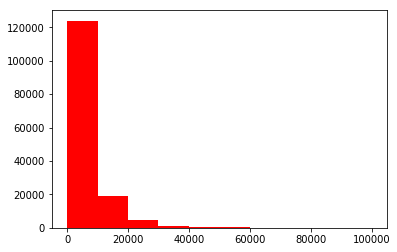

In [12]:
plt.hist(Train_data['price'], orientation = 'vertical',histtype = 'bar', color ='red')

### 数字变量的分析

In [13]:
## 1) 相关性分析
price_numeric = Train_data[numeric_var + y_label]
correlation = price_numeric.corr()
print(abs(correlation['price']).sort_values(ascending = False),'\n')
# 查看相关性绝对值

price        1.000000
v_3          0.730946
v_12         0.692823
v_8          0.685798
v_0          0.628397
kilometer    0.440519
v_11         0.275320
v_10         0.246175
power        0.219834
v_9          0.206205
v_5          0.164317
v_4          0.147085
v_2          0.085322
v_6          0.068970
v_1          0.060914
v_7          0.053024
v_14         0.035911
v_13         0.013993
Name: price, dtype: float64 



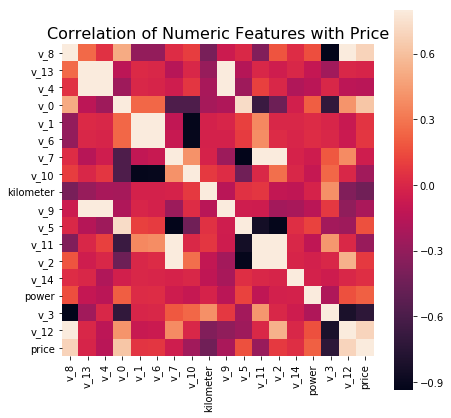

In [14]:
f , ax = plt.subplots(figsize = (7, 7))
plt.title('Correlation of Numeric Features with Price',y=1,size=16)
sns.heatmap(correlation,square = True,  vmax=0.8)

In [15]:
### 查看峰度和偏度
for col in numeric_var:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(Train_data[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(Train_data[col].kurt())  
         )

v_8             Skewness: 00.20     Kurtosis: -00.64
v_13            Skewness: 00.27     Kurtosis: -00.44
v_4             Skewness: 00.37     Kurtosis: -00.20
v_0             Skewness: -1.32     Kurtosis: 003.99
v_1             Skewness: 00.36     Kurtosis: -01.75
v_6             Skewness: 00.37     Kurtosis: -01.74
v_7             Skewness: 05.13     Kurtosis: 025.85
v_10            Skewness: 00.03     Kurtosis: -00.58
kilometer       Skewness: -1.53     Kurtosis: 001.14
v_9             Skewness: 00.42     Kurtosis: -00.32
v_5             Skewness: -4.74     Kurtosis: 022.93
v_11            Skewness: 03.03     Kurtosis: 012.57
v_2             Skewness: 04.84     Kurtosis: 023.86
v_14            Skewness: -1.19     Kurtosis: 002.39
power           Skewness: 65.86     Kurtosis: 5733.45
v_3             Skewness: 00.11     Kurtosis: -00.42
v_12            Skewness: 00.37     Kurtosis: 000.27


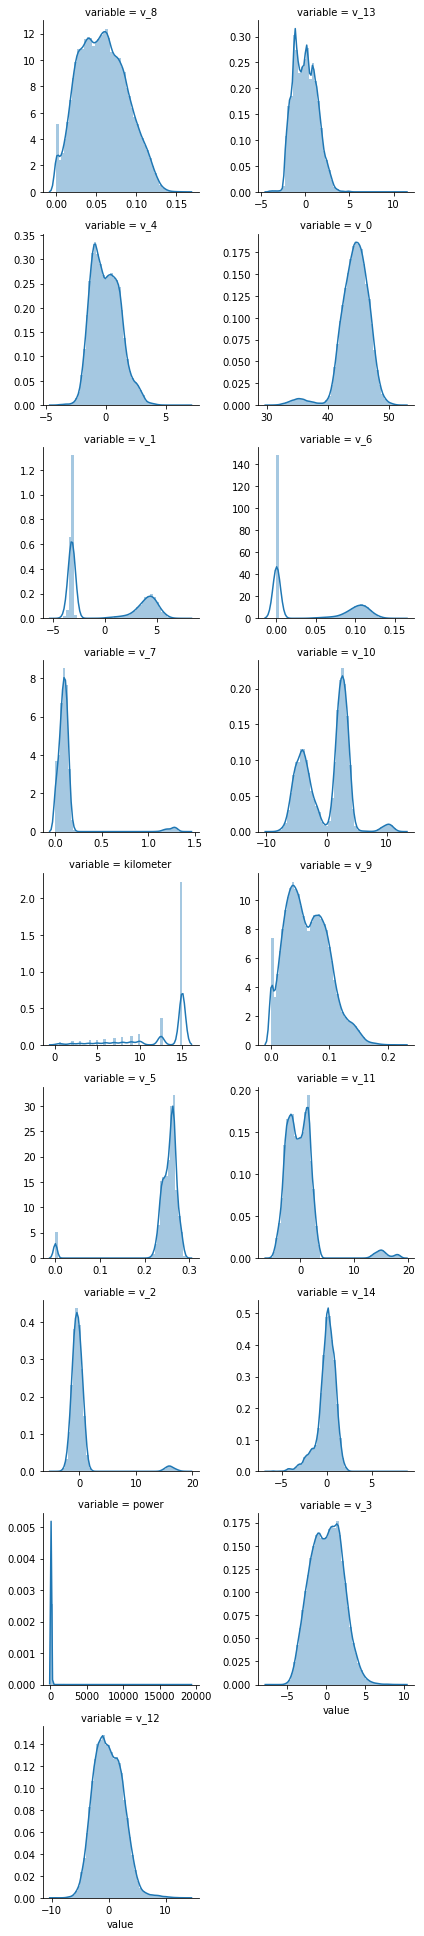

In [16]:
## 3) 每个数字特征得分布可视化
f = pd.melt(Train_data, value_vars=numeric_var)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

### 类别变量的浏览


In [17]:
## 1) unique分布
print(class_var)
# 获得可分析的变量
categorical_var = ['name','model','brand','bodyType','fuelType','gearbox','notRepairedDamage','regionCode','notRepairedDamage','seller','offerType']
categorical_dict={}
for fea in categorical_var:
    print(fea,Train_data[fea].nunique())
    categorical_dict[fea] = Train_data[fea].nunique()

['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode', 'creatDate', 'notRepairedDamage', 'seller', 'offerType']
name 99662
model 248
brand 40
bodyType 8
fuelType 7
gearbox 2
notRepairedDamage 3
regionCode 7905
notRepairedDamage 3
seller 2
offerType 1


In [19]:
categorical_var_plt = [i for i,j in categorical_dict.items() if j <= 50 and  j>1]
categorical_var_plt

['brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'seller']

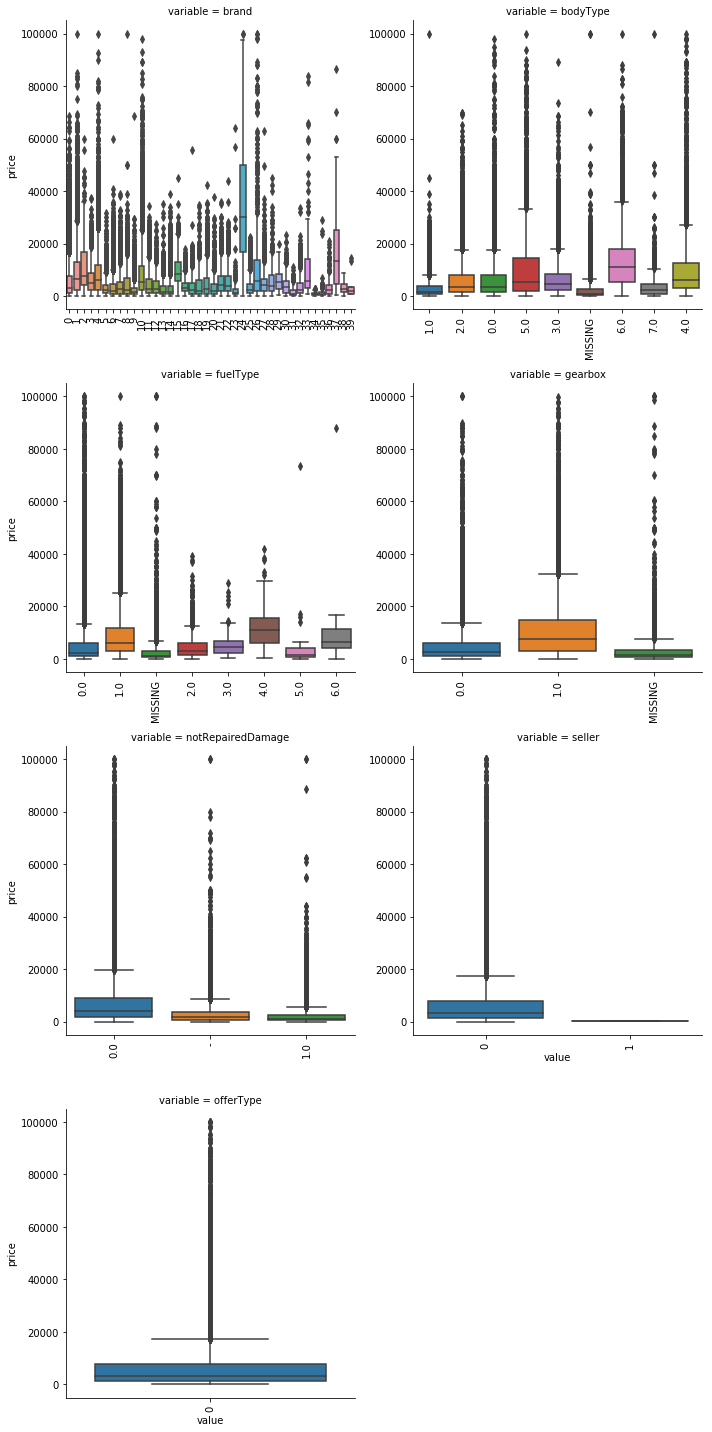

In [20]:
## 2) 类别特征箱形图可视化

# 因为 name和 regionCode的类别太稀疏了，这里我们把不稀疏的几类画一下.判断条件 不重复值大于50
for c in categorical_var:
    Train_data[c] = Train_data[c].astype('category')
    if Train_data[c].isnull().any():
        Train_data[c] = Train_data[c].cat.add_categories(['MISSING'])
        Train_data[c] = Train_data[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
categorical_var_plt = [i for i,j in categorical_dict.items() if j <= 50]
f = pd.melt(Train_data, id_vars=['price'], value_vars=categorical_var_plt)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "price")

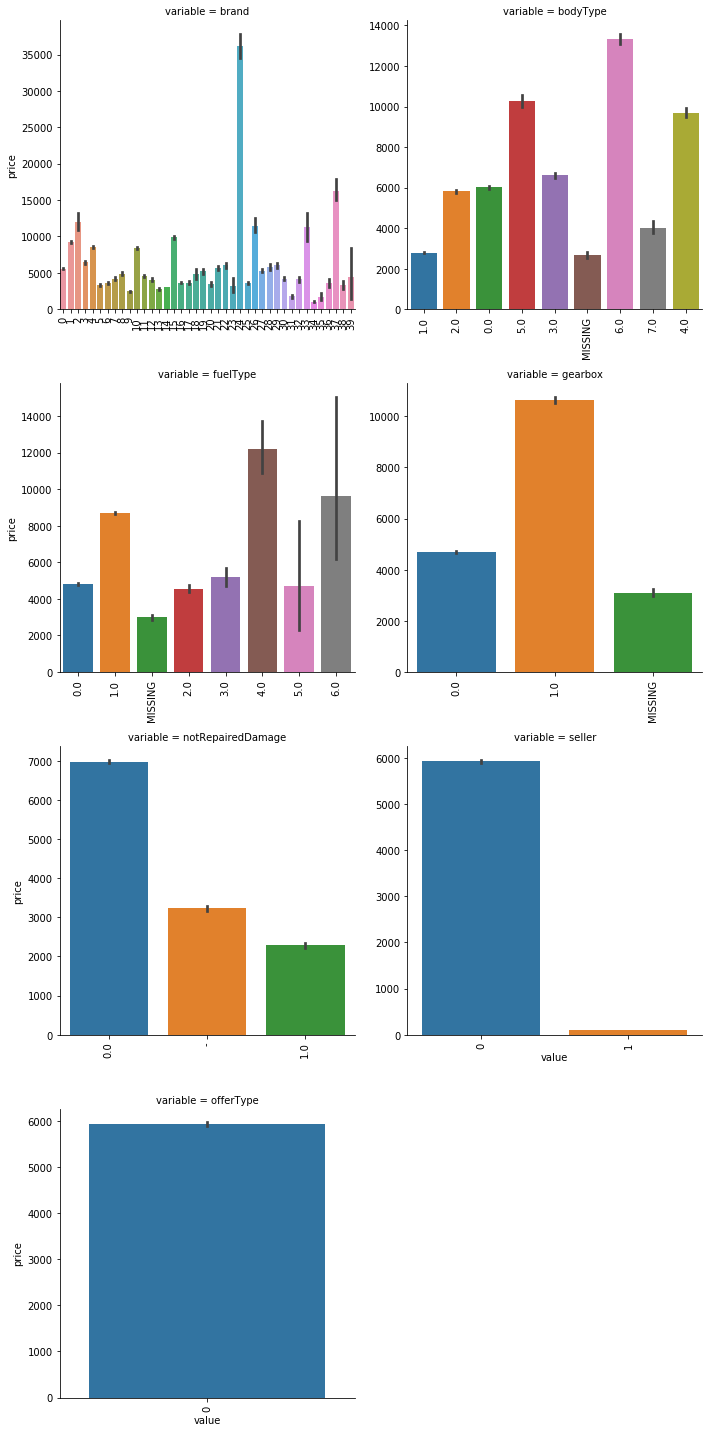

In [21]:
## 3) 类别特征的柱形图可视化
def bar_plot(x, y, **kwargs):
    sns.barplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(Train_data, id_vars=['price'], value_vars=categorical_var_plt)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(bar_plot, "value", "price")

In [22]:
##  4) 类别特征的每个类别频数可视化(count_plot)
def count_plot(x,  **kwargs):
    sns.countplot(x=x)
    x=plt.xticks(rotation=90)

f = pd.melt(Train_data,  value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(count_plot, "value")

NameError: name 'categorical_features' is not defined